# Feature Engineering

In [30]:
import pandas as pd
import numpy as np
from scipy import stats

In [31]:
#   Import datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#   DF shapes
print('Test set shape:', test.shape)
print('Train set shape:', train.shape)

Test set shape: (28913, 35)
Train set shape: (67463, 35)


In [32]:
#   Check nulls
train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [62]:
#   Find outliers
# train_adj = train[(np.abs(stats.zscore(train.select_dtypes(include=np.number))) < 3)]
train_adj = train[(np.abs(stats.zscore(train['Total Current Balance'])) < 3)]
train_adj = train_adj[(np.abs(stats.zscore(train_adj['Home Ownership'])) < 3)]
train_adj = train_adj[(np.abs(stats.zscore(train_adj['Total Revolving Credit Limit'])) < 3)]

print('Previous train shape:', train.shape)
print('\n')
print('Current train_adj shape:', train_adj.shape)

## Dúvida para mf, remover outlier de colunas especificas?

Previous train shape: (67463, 35)


Current train_adj shape: (64129, 35)


In [63]:
# Drop useless columns such as ID and batch enrolled
train_adj.drop(['ID','Batch Enrolled'], axis=1, inplace=True)

# Need to drop them in test set too
test_adj = test.drop(['ID','Batch Enrolled'], axis=1)

## String/Object Columns

In [64]:
train_adj.select_dtypes(include=object)

,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...
67458,C,A4,MORTGAGE,Verified,n,Credit card refinancing,w,INDIVIDUAL
67459,C,B3,RENT,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
67460,A,F3,MORTGAGE,Verified,n,Lending loan,w,INDIVIDUAL
67461,D,E3,OWN,Not Verified,n,Debt consolidation,f,INDIVIDUAL


### Grades
For this variable, we are going to consider classify clients in two groups. Low risk clients (A) and risky clients (B to G). This will be a dummy variable and we won't need the sub grade.

In [65]:
# Create a generic function to be used in train and test sets
def grade_dummy(df):
    df.drop('Sub Grade', axis=1, inplace=True)
    df['Low Risk'] = df['Grade'].apply(lambda x: 1 if x == 'A' else 0)
    df.drop('Grade', axis=1, inplace=True)

In [66]:
# Apply function to train set
grade_dummy(train_adj)
grade_dummy(test_adj)

In [67]:
train_adj.select_dtypes(include=object)

,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
...,...,...,...,...,...,...
67458,MORTGAGE,Verified,n,Credit card refinancing,w,INDIVIDUAL
67459,RENT,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
67460,MORTGAGE,Verified,n,Lending loan,w,INDIVIDUAL
67461,OWN,Not Verified,n,Debt consolidation,f,INDIVIDUAL


### Dummies for other status

In [39]:
# Create a list of object columns
object_list = train_adj.select_dtypes(include=object)

# Check how many unique entries we have in each column
for i in object_list:
    print('Unique values of:', i,object_list[i].nunique(), object_list[i].unique())
    print('\n')

Unique values of: Employment Duration 3 ['MORTGAGE' 'RENT' 'OWN']


Unique values of: Verification Status 3 ['Not Verified' 'Source Verified' 'Verified']


Unique values of: Payment Plan 1 ['n']


Unique values of: Loan Title 109 ['Debt Consolidation' 'Debt consolidation' 'Credit card refinancing'
 'Home improvement' 'Credit Consolidation' 'Green loan' 'Other'
 'Moving and relocation' 'Credit Cards' 'Medical expenses'
 'DEBT CONSOLIDATION' 'Home Improvement' 'Refinance'
 'credit card consolidation' 'Debt Consolidation Loan' 'Major purchase'
 'Vacation' 'Business' 'Credit card payoff' 'Credit Card Consolidation'
 'credit card' 'Credit Card Refi' 'Personal Loan' 'CC Refi' 'consolidate'
 'Medical' 'Loan 1' 'Consolidation' 'Card Consolidation' 'Car financing'
 'debt' 'home improvement' 'debt consolidation' 'Home buying' 'Freedom'
 'Consolidate' 'Consolidated' 'Lending Club' 'consolidation loan'
 'Dept consolidation' 'Personal loan' 'Personal' 'cards' 'Cards'
 'Bathroom' 'refi' 'Credit Card

Based on this ouput, we can exclude `Payment Plan` since there's no variability in this column.

The others `Employment Duration`, `Verification Status` and `Application Type` we can transform into a dummy.

Our issue is with `Loan Title`, on which we have many different reason to get a loan and even the same reasons are writen in different ways.

In [68]:
# Create credit card list word list
cc_list = ['cc', 'credit card', 'credit', 'card']
asset_list = ['home', 'house', 'car']

# Create function to use on train and test set
def loan_objective(df):
    loan_obj = []
    for i in df['Loan Title']:
        if 'consolidat' in i.lower(): loan_obj.append('consolidation')
        elif 'refinanc' in i.lower() : loan_obj.append('refinancing')
        elif any(cc in i.lower() for cc in cc_list): loan_obj.append('credit card')
        elif any(asset in i.lower() for asset in asset_list): loan_obj.append('asset purchase')
        else: loan_obj.append('other')
    df['loan_obj'] = loan_obj
    df.drop('Loan Title', axis=1, inplace=True)

# Use in train and test sets
loan_objective(train_adj)
loan_objective(test_adj)


In [69]:
# Drop column with no variability
train_adj.drop('Payment Plan', axis=1, inplace=True)
test_adj.drop('Payment Plan', axis=1, inplace=True)

# Create dummies for the other object columns
train_adj = pd.get_dummies(train_adj, dtype=np.number)
test_adj = pd.get_dummies(test_adj, dtype=np.number)

d:\Documentos\My_Py_Projects\github_DS_projects\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
d:\Documentos\My_Py_Projects\github_DS_projects\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
d:\Documentos\My_Py_Projects\github_DS_projects\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
d:\Documentos\My_Py_Projects\github_DS_projects\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.ine

In [70]:
# Clean redundant columns in both sets
def clean_df(df):
    df.drop(['Verification Status_Not Verified', 'Verification Status_Source Verified',
             'Initial List Status_w', 'Application Type_JOINT'], axis=1, inplace=True)
    
clean_df(train_adj)
clean_df(test_adj)

# Check if shapes are the same
print('Train set shape:', train_adj.shape)
print('Test set shape:', test_adj.shape)

Train set shape: (64129, 37)
Test set shape: (28913, 37)


## Final touches
Now we have both datasets with the same shapes, let's save it and then do a quick correlation analysis.

In [43]:
# Save datasets
train_adj.to_csv('train_adj.csv')
test_adj.to_csv('test_adj.csv')

In [45]:
# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Adjust datasets
train_adj.insert(0,'Loan Status', train_adj.pop('Loan Status'))
test_adj.insert(0,'Loan Status', test_adj.pop('Loan Status'))

<Axes: >

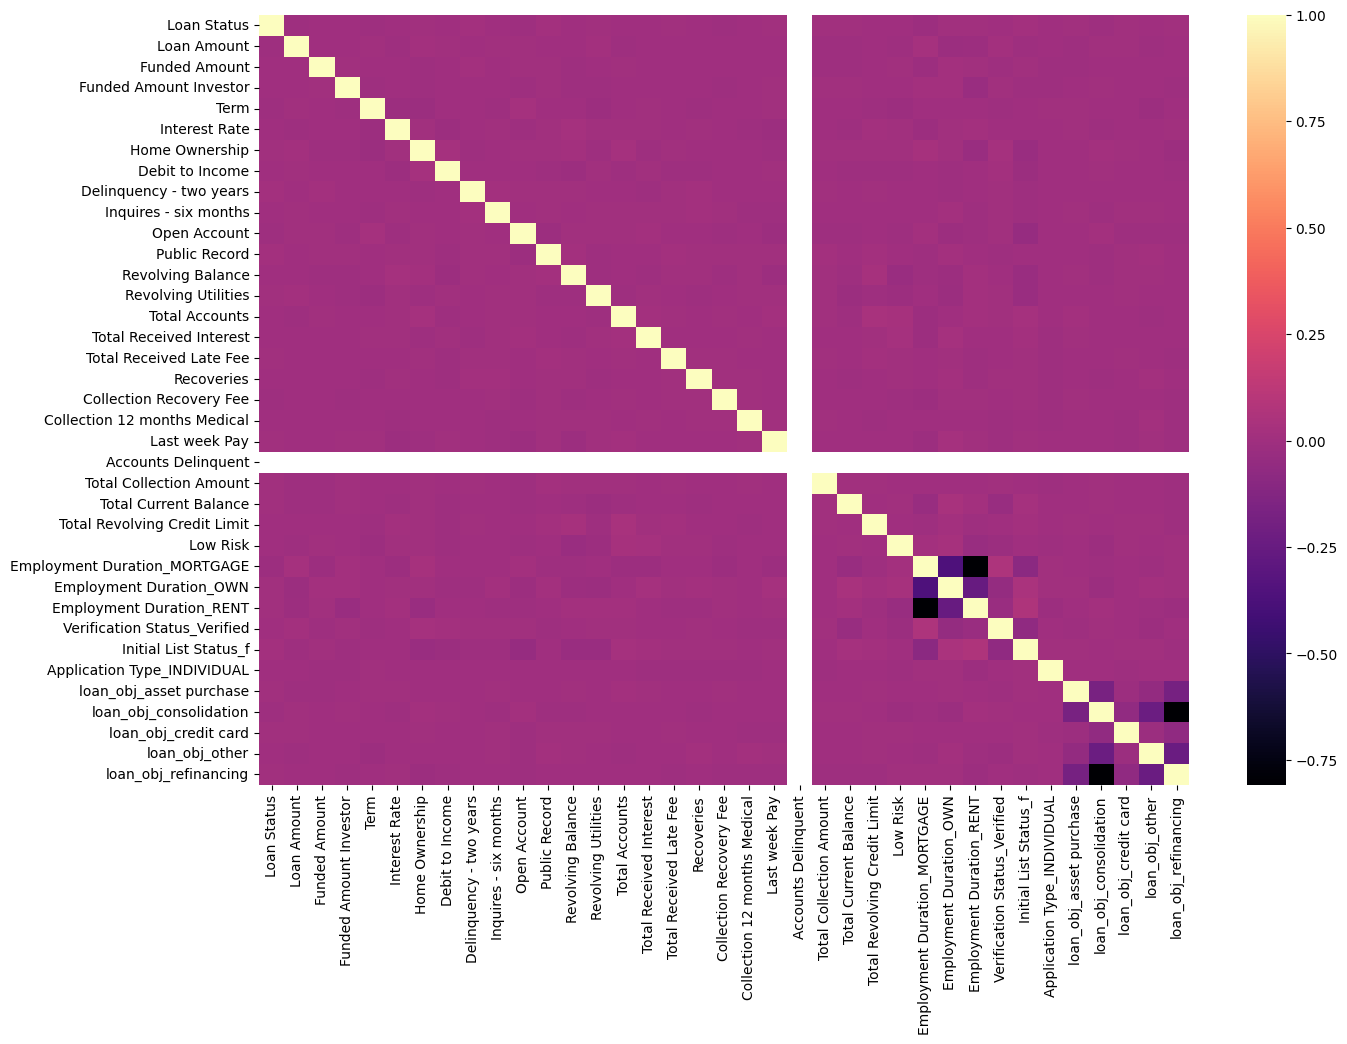

In [78]:
# Plot heatmap for train set adjusted
plt.figure(figsize=(15,10))
sns.heatmap(train_adj.corr(), cmap='magma')


<Axes: >

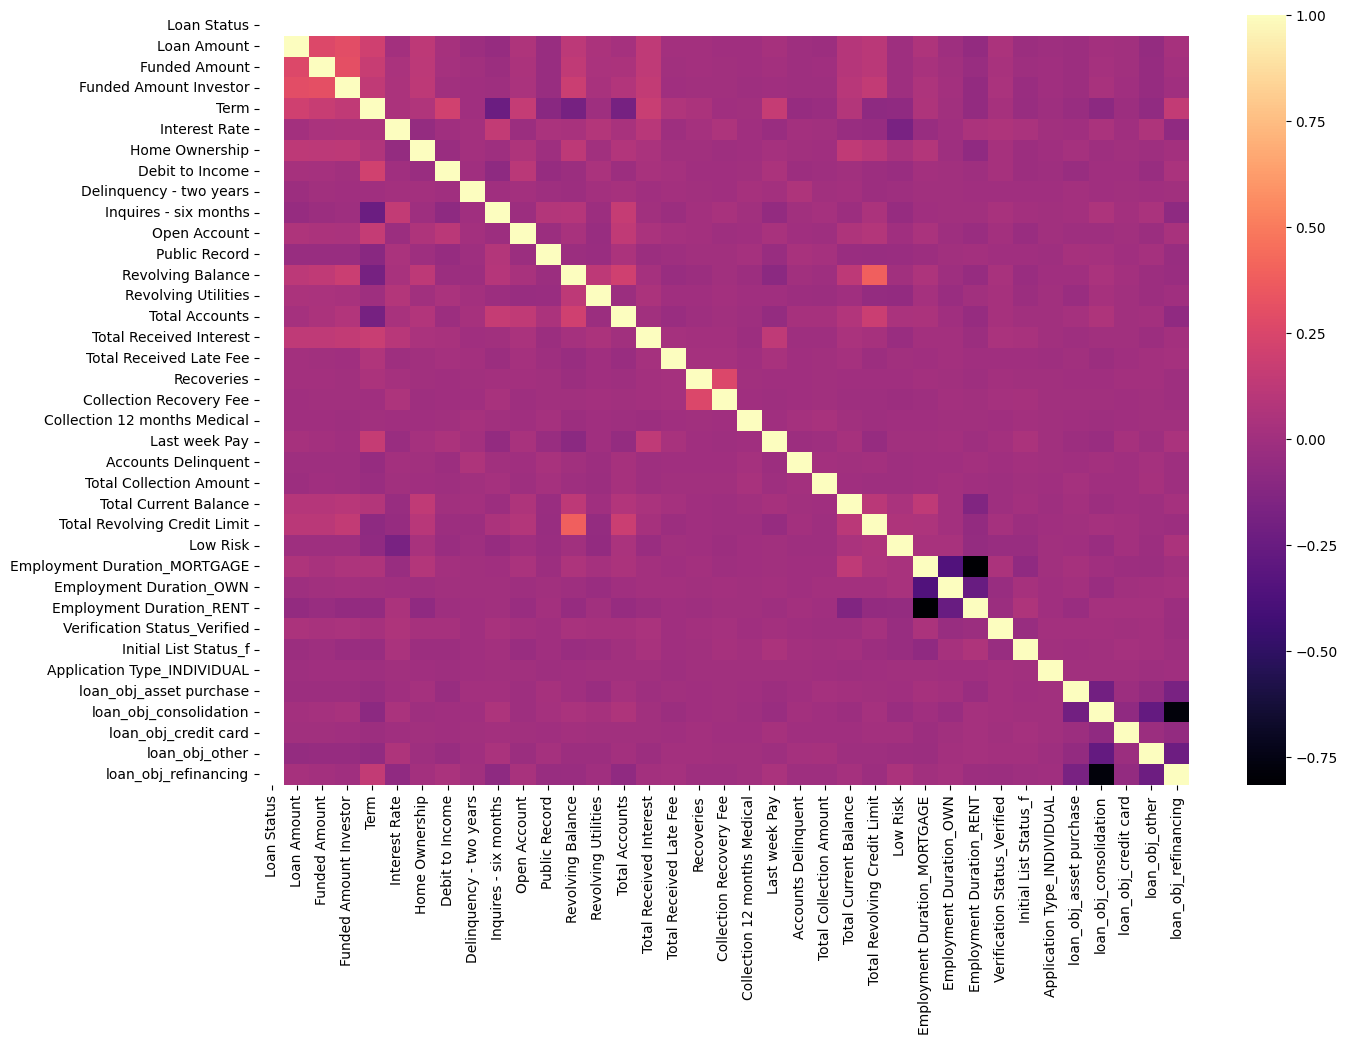

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(test_adj.corr(), cmap='magma')

In [89]:
print('Total classes in training set', train_adj['Loan Status'].value_counts(), '\n')
print('Percentage of default in training set', 
      round((train_adj['Loan Status'].value_counts()[1]/len(train_adj['Loan Status']))*100,2),'%')


Total classes in training set Loan Status
0    58209
1     5920
Name: count, dtype: int64 

Percentage of default in training set 9.23 %

